# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(0)  # Para mayor determinismo
%matplotlib inline

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [65]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
y_test.sample(5)

156     0
1390    0
1541    0
467     0
944     0
Name: TARGET, dtype: int64

In [67]:
X.sample(5)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1135,12400,115004.0,144760.0,2.0,0.0,0.0,279.522173,1.0,46.0,35.614731
1605,9300,38115.0,60493.0,14.0,0.0,0.0,91.932632,0.0,18.0,29.633608
438,8800,56963.0,70607.0,4.0,0.0,0.0,99.764415,3.0,19.0,40.345261
1555,4900,25597.0,23031.0,5.0,0.0,0.0,101.746766,0.0,8.0,33.243157
1535,27900,55859.0,92179.0,0.0,0.0,1.0,94.932544,0.0,23.0,33.097899


In [68]:
y_train.sample(5)
#y_test.sample(5)

1826    1
320     0
1394    0
1512    0
1040    0
Name: TARGET, dtype: int64


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1) El conjunto de datos son datos recopilados de solicitantes recientes que recibieron crédito a través del proceso actual 
de suscripción de préstamos.
2) BAD es una variable binaria que indica si un solicitante eventualmente dejó de cumplir con los pagos o si 
estaba seriamente en mora.
 Label: 1 = cliente incumplido en préstamo - 0 = préstamo pagado
3) Hay 12 variables de entrada
(loan: Importe de la solicitud de préstamo  
 mortdue: Monto adeudado en la hipoteca existente 
 value: Valor de la propiedad actual 
 yoj: Años en el trabajo actual
 DEROG: Número de informes despectivos importantes
 DELINQ: Número de líneas de crédito morosas
 CLAGE: Edad de la línea comercial más antigua en meses.
 NINQ: Número de líneas de crédito recientes
 CLNO: Número de líneas de crédito
 DEBTINC: Relación deuda - ingresos
)
4) Creo que serían las siguientes: mortdue, NINQ, DEROG, DELINQ

In [69]:
features_names = ["LOAN","MORTDUE","VALUE","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC"]
features_names

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [70]:
target_names = ["class_0", "class_1"]
target_names

['class_0', 'class_1']

C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Reporte de clasificación para el clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       313
           1       0.07      0.03      0.05        58

   micro avg       0.78      0.78      0.78       371
   macro avg       0.45      0.47      0.46       371
weighted avg       0.72      0.78      0.74       371



Accuracy of SGDC classifier on training set: 0.77
Accuracy of SGDC classifier on test set: 0.78


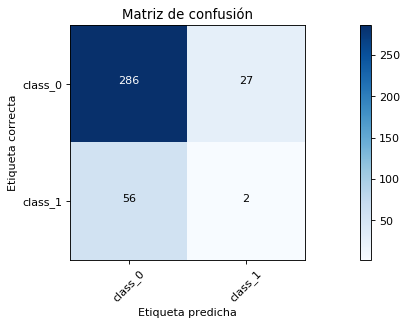

In [71]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

m = SGDClassifier()

m.fit(X_train, y_train)    

print("Reporte de clasificación para el clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, m.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")
    
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=target_names, title="Matriz de confusión")

print('Accuracy of SGDC classifier on training set: {:.2f}' .format(m.score(X_train, y_train)))
print('Accuracy of SGDC classifier on test set: {:.2f}'.format(m.score(X_test, y_test)))

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [9]:
dataset.target_names

AttributeError: 'DataFrame' object has no attribute 'target_names'

C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.825 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.761 (+/-0.019) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.680 (+/-0.066) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.670 (+/-0.063) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.690 (+/-0.068) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.01,

C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.698 (+/-0.070) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.808 (+/-0.002) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.566 (+/-0.105) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.570 (+/-0.099) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.699 (+/-0.070) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.566 (+/-0.082) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.741 (+/-0.032) para los parámetros {'alpha': 0.001, 'eta0': 0.01,

C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.690 (+/-0.066) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.769 (+/-0.012) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.706 (+/-0.054) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.699 (+/-0.069) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.666 (+/-0.065) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.764 (+/-0.007) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.725 (+/-0.028) para los parámetros {'alpha': 0.001, 'eta0'

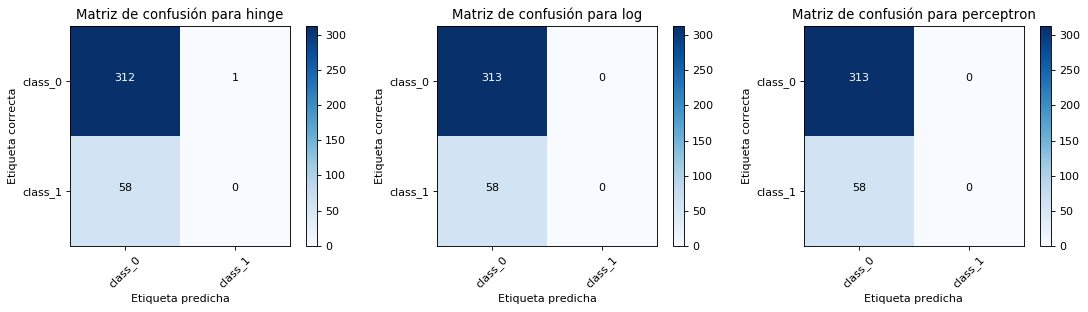

In [73]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=target_names, title="Matriz de confusión para %s" % loss)
    
    print('Accuracy of SGDC classifier on training set: {:.2f}' .format(model.score(X_train, y_train)))
    print('Accuracy of SGDC classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
from sklearn import tree
import graphviz

In [13]:
#clf = tree.DecisionTreeClassifier(max_depth=2)
#clf = clf.fit(X_train, y_train)

In [3]:
#features_names

NameError: name 'features_names' is not defined

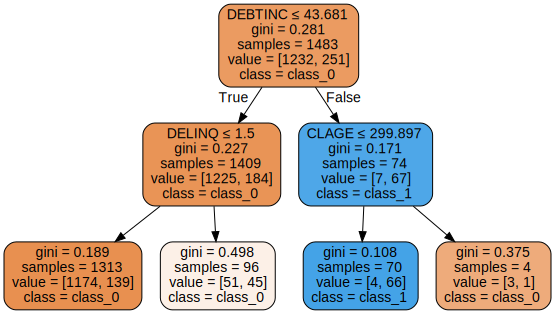

In [16]:
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                         feature_names=features_names,  
#                         class_names=target_names,  
#                         filled=True, rounded=True,  
#                         special_characters=True)
#graph = graphviz.Source(dot_data)
#graph

In [17]:
#predictions = clf.predict(X_train)
#print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 87 


In [18]:
#predictions = clf.predict(X_test)
#print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy: 88 


In [82]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

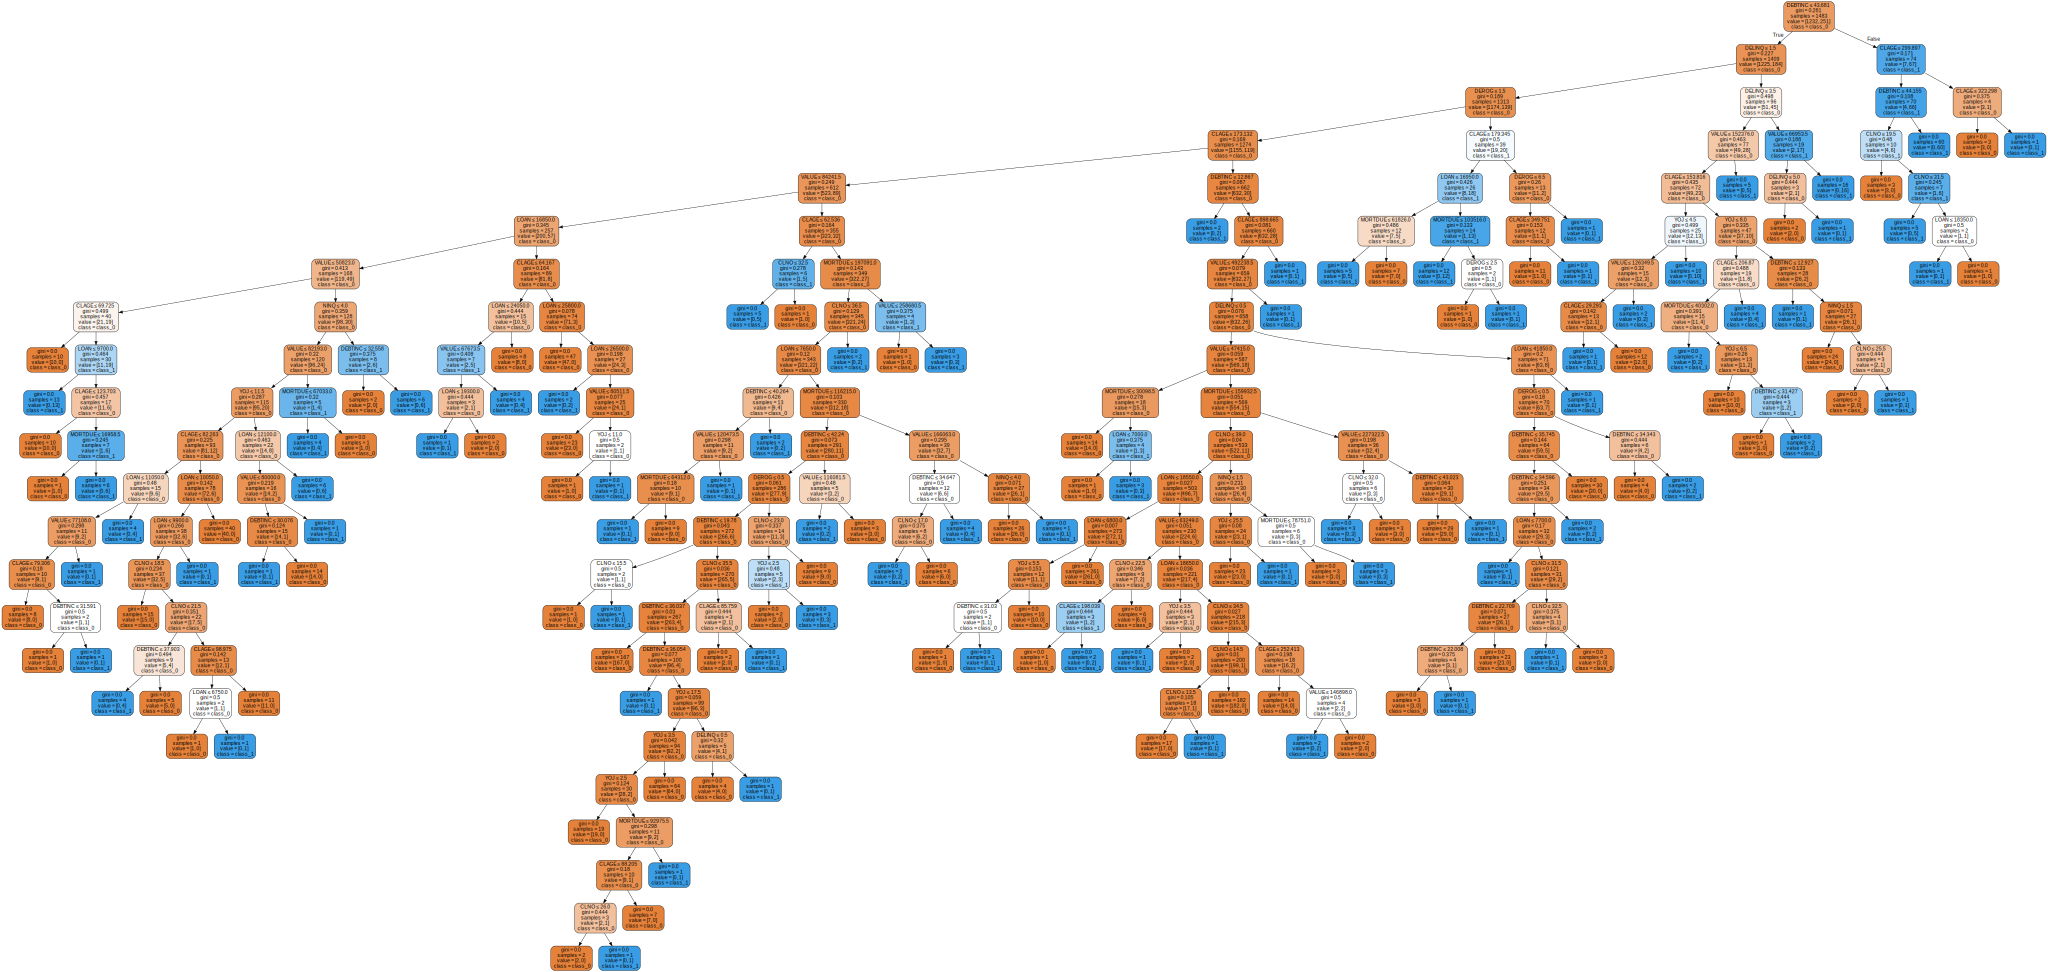

In [83]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [84]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 100 


In [85]:
predictions = clf.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy: 87 


### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [74]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

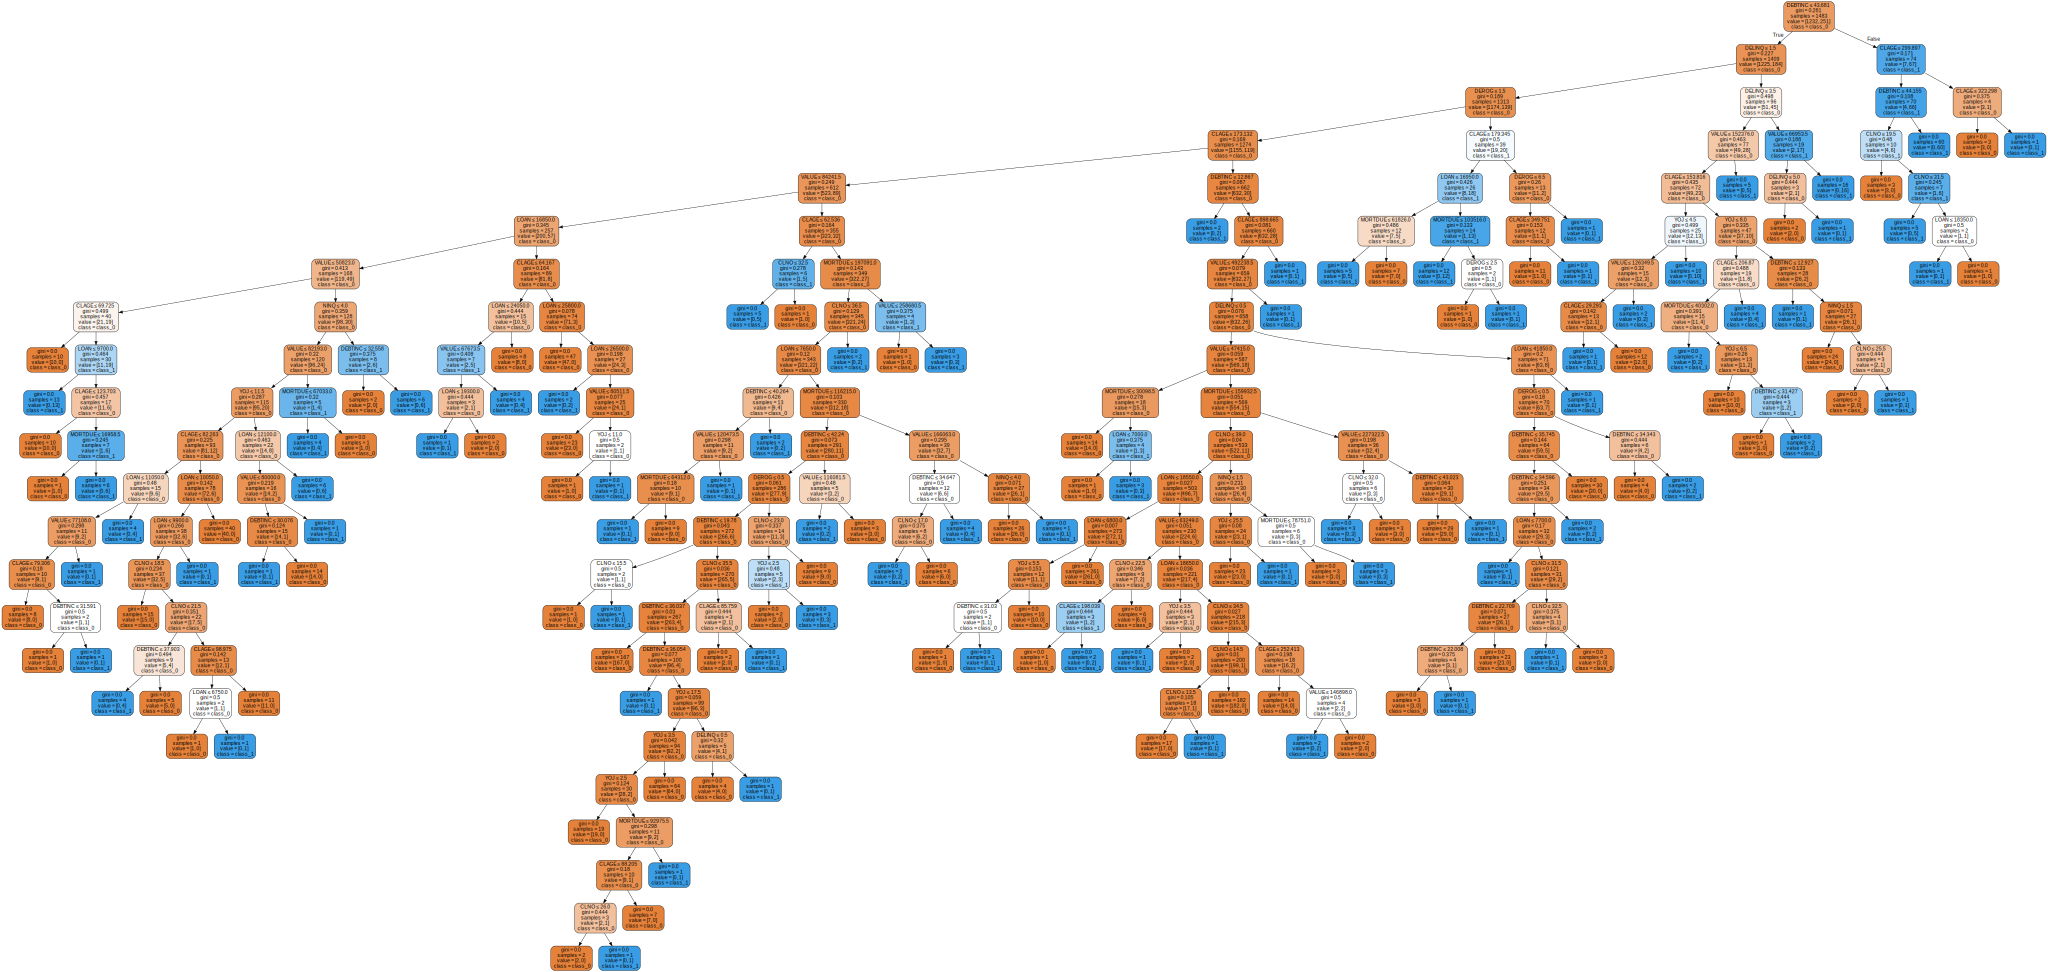

In [86]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [87]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 100 


Accuracy sobre los datos de tests:

In [88]:
predictions = clf.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy: 87 


In [89]:
print("Reporte de clasificación (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

Reporte de clasificación (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       313
           1       0.59      0.62      0.61        58

   micro avg       0.87      0.87      0.87       371
   macro avg       0.76      0.77      0.76       371
weighted avg       0.88      0.87      0.87       371




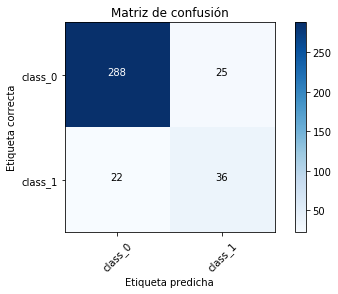

In [90]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=target_names, title="Matriz de confusión")

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [80]:
np.random.seed(0)

# Exploración de hiperparámetros para función criterion "gini"

Mejor conjunto de parámetros:
{'max_depth': 21, 'min_samples_leaf': 4}

Puntajes de la grilla:

Exactitud: 0.864 (+/-0.001) para los parámetros {'max_depth': 20, 'min_samples_leaf': 2}
Exactitud: 0.855 (+/-0.001) para los parámetros {'max_depth': 20, 'min_samples_leaf': 3}
Exactitud: 0.864 (+/-0.001) para los parámetros {'max_depth': 20, 'min_samples_leaf': 4}
Exactitud: 0.858 (+/-0.000) para los parámetros {'max_depth': 21, 'min_samples_leaf': 2}
Exactitud: 0.847 (+/-0.001) para los parámetros {'max_depth': 21, 'min_samples_leaf': 3}
Exactitud: 0.869 (+/-0.001) para los parámetros {'max_depth': 21, 'min_samples_leaf': 4}
Exactitud: 0.864 (+/-0.001) para los parámetros {'max_depth': 22, 'min_samples_leaf': 2}
Exactitud: 0.855 (+/-0.001) para los parámetros {'max_depth': 22, 'min_samples_leaf': 3}
Exactitud: 0.869 (+/-0.001) para los parámetros {'max_depth': 22, 'min_samples_leaf': 4}

Reporte de clasificación para el mejor

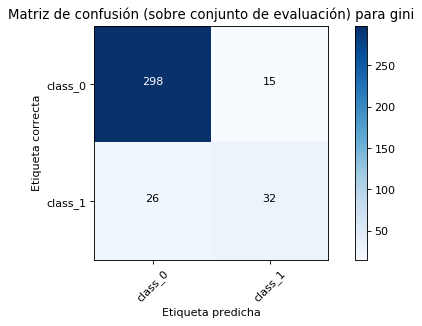

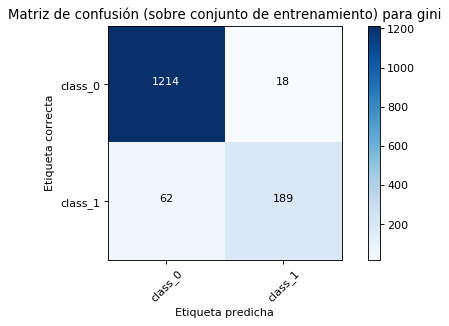

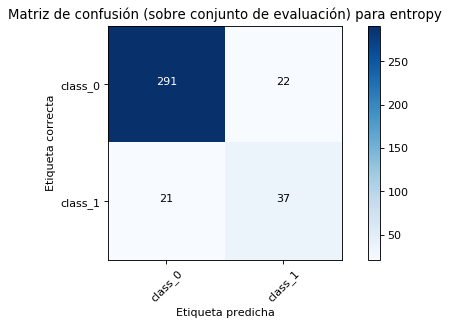

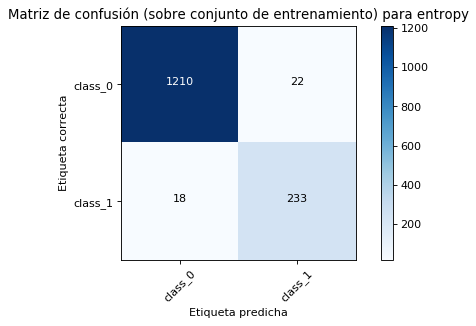

In [91]:
for idx, criterion in enumerate(('gini','entropy'),start=1):
    exploring_params = {
        "max_depth" :  [20, 21, 22],
        "min_samples_leaf" : [2,3,4]
    }
    m = tree.DecisionTreeClassifier(criterion=criterion)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy') #cv se le especifica el 5-fold cross validation
    model.fit(X_train, y_train)
    print("# Exploración de hiperparámetros para función criterion \"%s\"" % criterion, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")
    
    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()
    
    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")
    
    plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(1, 2, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=target_names, title="Matriz de confusión (sobre conjunto de evaluación) para %s" % criterion)
    

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de entrenamiento):", end="\n\n")
    y_true_t, y_pred_t = y_train, model.predict(X_train)
    print(classification_report(y_true_t, y_pred_t), end="\n\n")
    
    print("================================================", end="\n\n")
    
    plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(1, 2, idx)
    plot_confusion_matrix(confusion_matrix(y_true_t, y_pred_t),
                          classes=target_names, title="Matriz de confusión (sobre conjunto de entrenamiento) para %s" % criterion)
    
    print ("Accuracy on test is ", accuracy_score(y_test,y_pred)*100)
    print ("Accuracy on training is ", accuracy_score(y_train,y_pred_t)*100)
    
    print("================================================", end="\n\n")